<a href="https://colab.research.google.com/github/khalid-data-aspirant42/celestial_body_classification/blob/main/solar_system_object_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd  # to work with dataset
import numpy as np  # to work with mathematical analysis

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# t-tests for comparing means
from scipy.stats import ttest_ind

# library for predictive modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Creating the dataset
def generate_dummy_data(num_asteroids, num_comets, ast_min, ast_max):
    # Generate dummy data for asteroids
    asteroid_names = ['Asteroid{}'.format(i) for i in range(1, num_asteroids + 1)]
    asteroids = pd.DataFrame({
        'Name': np.random.choice(asteroid_names, size=num_asteroids, replace=False),
        'Diameter (km)': np.random.uniform(ast_dia_min, ast_dia_max, size=num_asteroids),
        'Period of Revolution (years)': np.random.uniform(ast_min, ast_max, size=num_asteroids),
        'Mass (MTonne)': np.random.uniform(ast_mass_min, ast_mass_max, size=num_asteroids),
        'Max Distance from Sun (AU)': np.random.uniform(max_range_min, max_range_max, size=num_asteroids),
        'Min Distance from Sun (AU)': np.random.uniform(min_range_min, min_range_max, size=num_asteroids),
        'Type': ['Asteroid'] * num_asteroids
    })

    # Generate dummy data for comets
    comet_names = ['Comet{}'.format(i) for i in range(1, num_comets + 1)]
    comets = pd.DataFrame({
        'Name': np.random.choice(comet_names, size=num_comets, replace=False),
        'Diameter (km)': np.random.uniform(com_dia_min, com_dia_max, size=num_comets),
        'Period of Revolution (years)': np.random.uniform(com_range_min, com_range_max, size=num_comets),
        'Mass (MTonne)': np.random.uniform(com_mass_min, com_mass_max, size=num_comets),
        'Max Distance from Sun (AU)': np.random.uniform(max_range_min, max_range_max, size=num_comets),
        'Min Distance from Sun (AU)': np.random.uniform(min_range_min, min_range_max, size=num_comets),
        'Type': ['Comet'] * num_comets
    })

    planets = pd.DataFrame({
    'Name': ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
    'Diameter (km)': [4879, 12104, 12756, 6792, 139820, 116460, 50724, 49244],
    'Period of Revolution (years)': [0.24, 0.62, 1, 1.88, 11.86, 29.46, 84.01, 164.8],
    'Mass (MTonne)': [3.30e14, 4.87e15, 5.97e15, 6.42e14, 1.90e18, 5.68e17, 8.68e16, 1.02e17],
    'Max Distance from Sun (AU)': [0.47, 0.73, 1.02, 1.67, 5.46, 10.12, 20.08, 30.07],
    'Min Distance from Sun (AU)': [0.31, 0.71, 0.98, 1.38, 4.95, 9.01, 18.33, 29.81],
    'Type': ['Planet', 'Planet', 'Planet', 'Planet', 'Planet', 'Planet', 'Planet', 'Planet']})

    # Concatenate the dataframes into a single dataset
    df = pd.concat([asteroids, comets, planets])

    # Reset the index of the final dataset
    df.reset_index(drop=True, inplace=True)

    return df

# generate object names
import random

names_asteroid = ['Apollos', 'Amors', 'Atens', 'Hungarias', 'Mars Crossers', 'Ceres','Vesta','Pallas','Eros','Apophis']
names_comet = ['Halley', 'Hale-Bopp', 'Encke', 'McNaught', 'Ikeya-Zhang','Hyakutake','Borrelly','Chiron','Holmes','Bennett']

def generate_object_names(num_names, object_list):
    names = []
    for _ in range(num_names):
        name = ''
        # Generate a random number of name components (2-4) for each name
        num_components = random.randint(2, 4)

        for _ in range(num_components):
            # Generate a random name component (e.g., first name, middle name, last name)
            name_component = random.choice(object_list)
            name += name_component + ' '

        names.append(name.strip())

    return names

# Example usage
num_asteroids, num_comets = 500, 450

com_range_min, com_range_max = 3.3, 330
com_dia_min, com_dia_max = 5, 70
com_mass_min, com_mass_max = 1e04, 5e05
ast_mass_min, ast_mass_max = 1e02, 7e08
max_range_min, max_range_max = 400, 960
min_range_min, min_range_max = 0.35 , 100
ast_min, ast_max = 3, 6
ast_dia_min, ast_dia_max = 0.1, 530

asteroid_names = generate_object_names(num_asteroids , names_asteroid)
comet_names = generate_object_names(num_comets , names_comet)

df = generate_dummy_data(num_asteroids, num_comets, ast_min, ast_max)

# Replace the generic names with actual names
df.loc[df['Type'] == 'Asteroid', 'Name'] = np.random.choice(asteroid_names, size=num_asteroids, replace=False)
df.loc[df['Type'] == 'Comet', 'Name'] = np.random.choice(comet_names, size=num_comets, replace=False)


In [ ]:
# Data Exploration

'''This dataset is just a projection of the real dataset, not a real dataset'''

df.head()  # Display the first few rows

,Name,Diameter (km),Period of Revolution (years),Mass (MTonne),Max Distance from Sun (AU),Min Distance from Sun (AU),Type,Type_label
0,Ceres Amors,344.470523,4.862833,6.324336e+07,453.913999,91.191924,Asteroid,0
1,Amors Ceres Apophis,380.414685,3.591982,3.956738e+08,732.476000,17.376644,Asteroid,0
2,Mars Crossers Ceres,23.120323,3.937821,5.905187e+08,807.757493,23.806230,Asteroid,0
3,Eros Ceres Eros Hungarias,311.359059,5.041078,2.415496e+08,529.088052,96.037217,Asteroid,0
4,Apophis Hungarias Mars Crossers,153.217901,5.157659,2.741473e+08,445.178973,40.971503,Asteroid,0


In [ ]:
df.info()  # Summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          958 non-null    object 
 1   Diameter (km)                 958 non-null    float64
 2   Period of Revolution (years)  958 non-null    float64
 3   Mass (MTonne)                 958 non-null    float64
 4   Max Distance from Sun (AU)    958 non-null    float64
 5   Min Distance from Sun (AU)    958 non-null    float64
 6   Type                          958 non-null    object 
dtypes: float64(5), object(2)
memory usage: 52.5+ KB


In [ ]:
df.describe()  # Statistical summary of the numeric columns

,Diameter (km),Period of Revolution (years),Mass (MTonne),Max Distance from Sun (AU),Min Distance from Sun (AU)
count,958.000000,958.000000,9.580000e+02,958.000000,958.000000
mean,567.213331,80.388178,2.785608e+15,676.527241,52.005446
std,6320.408269,102.879596,6.419006e+16,169.611794,28.751588
min,0.379176,0.240000,1.069335e+04,0.470000,0.310000
25%,34.624472,4.396127,2.601315e+05,544.046026,28.515964
50%,65.146196,5.838295,3.212610e+07,678.910271,52.126500
75%,280.289265,155.675579,3.917013e+08,816.649962,77.039398
max,139820.000000,329.906500,1.900000e+18,959.316465,99.937744


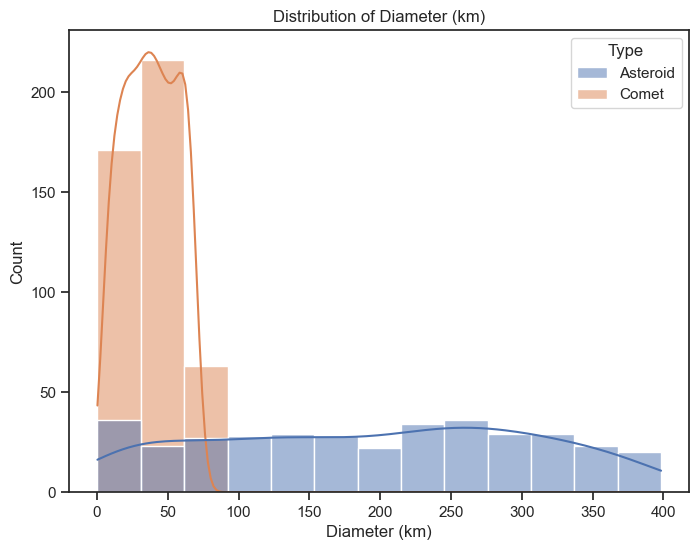

In [ ]:
# Data Visualization
sns.set(style="ticks")

# Histogram of Diameter (km)
df2 = df[df['Diameter (km)']<=df['Diameter (km)'].quantile(0.85)]
plt.figure(figsize=(8, 6))
sns.histplot(data=df2, x='Diameter (km)', hue='Type', kde=True)
plt.title('Distribution of Diameter (km)')
plt.xlabel('Diameter (km)')
plt.ylabel('Count')
plt.show()

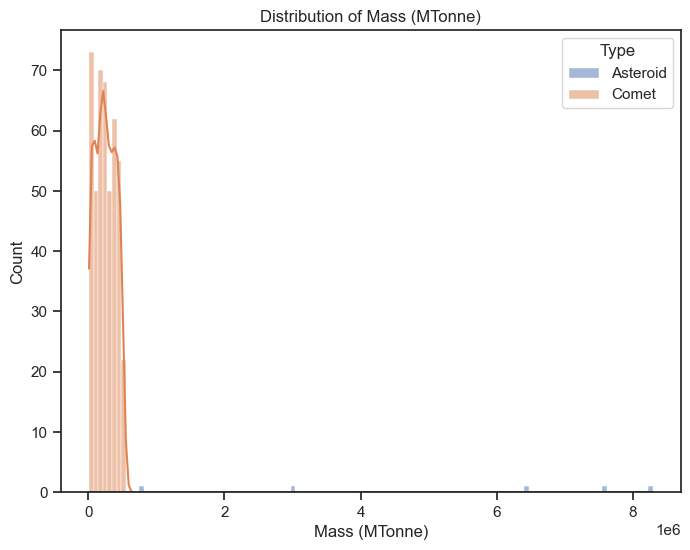

In [ ]:
# Histogram of Mass (MTonne)
df3 = df[df['Mass (MTonne)']<=df['Mass (MTonne)'].quantile(0.475)]
plt.figure(figsize=(8, 6))
sns.histplot(data=df3, x='Mass (MTonne)', hue='Type', kde=True)
plt.title('Distribution of Mass (MTonne)')
plt.xlabel('Mass (MTonne)')
plt.ylabel('Count')
plt.show()

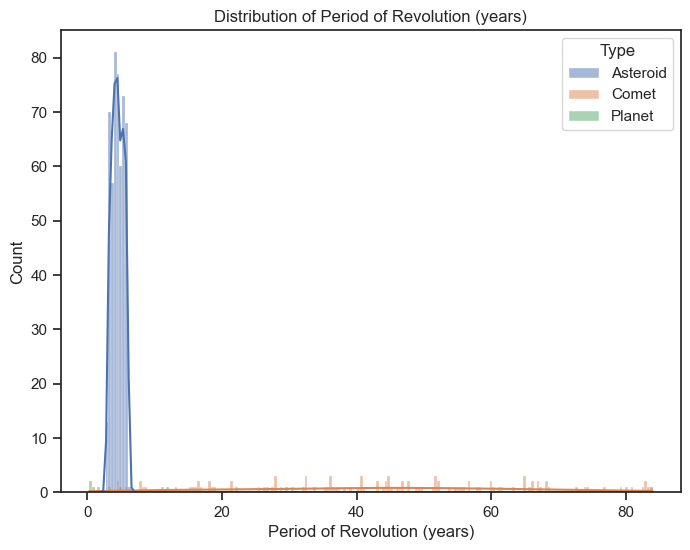

In [ ]:
# Histogram of Period of Revolution (years)
df4 = df[df['Period of Revolution (years)']<=df['Period of Revolution (years)'].quantile(0.65)]
plt.figure(figsize=(8, 6))
sns.histplot(data=df4, x='Period of Revolution (years)', hue='Type', kde=True)
plt.title('Distribution of Period of Revolution (years)')
plt.xlabel('Period of Revolution (years)')
plt.ylabel('Count')
plt.show()

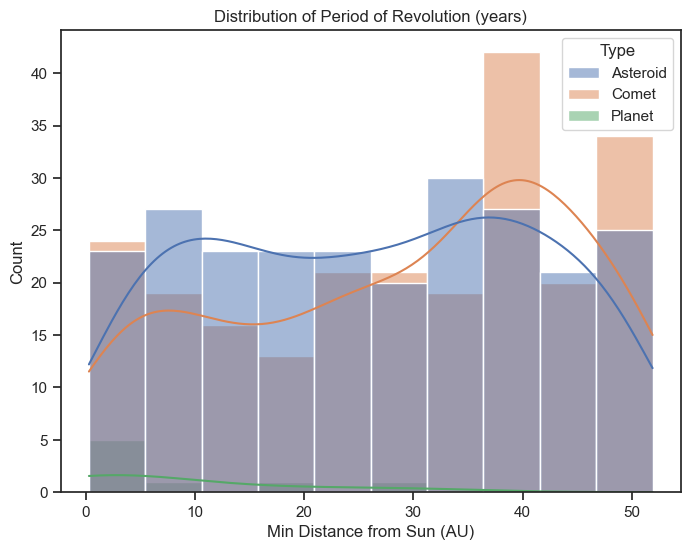

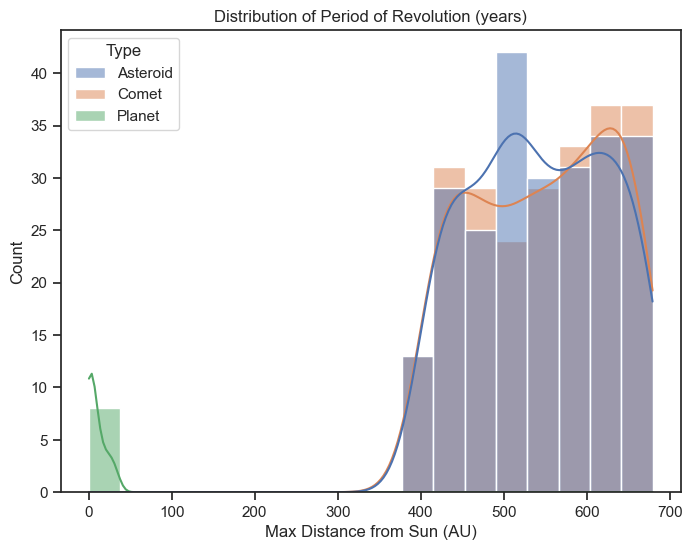

In [ ]:
# Histogram of Maximum and Minimum Distance
distance = ['Min Distance from Sun (AU)','Max Distance from Sun (AU)']
for elem in distance:
    df5 = df[df[elem]<=df[elem].quantile(0.5)]
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df5, x=elem, hue='Type', kde=True)
    plt.title('Distribution of Period of Revolution (years)')
    plt.xlabel(elem)
    plt.ylabel('Count')
    plt.show()

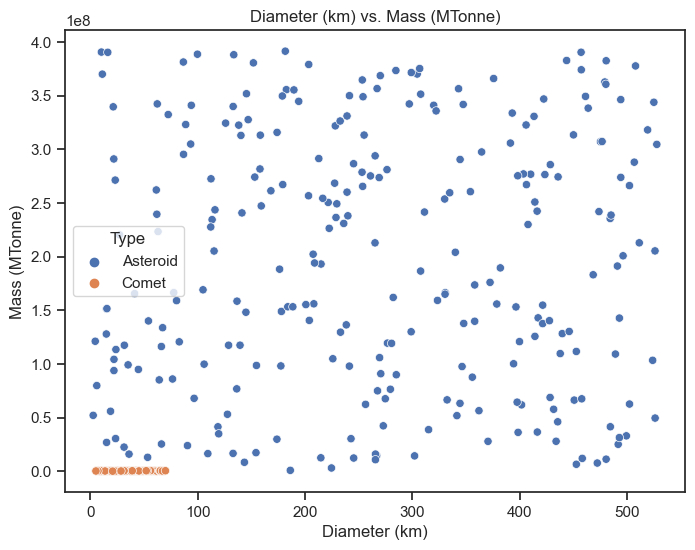

In [ ]:
# Scatter plot of Diameter (km) vs. Mass (kg)
df6 = df[df['Mass (MTonne)']<=df['Mass (MTonne)'].quantile(0.75)]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df6, x='Diameter (km)', y='Mass (MTonne)', hue='Type')
plt.title('Diameter (km) vs. Mass (MTonne)')
plt.xlabel('Diameter (km)')
plt.ylabel('Mass (MTonne)')
plt.show()

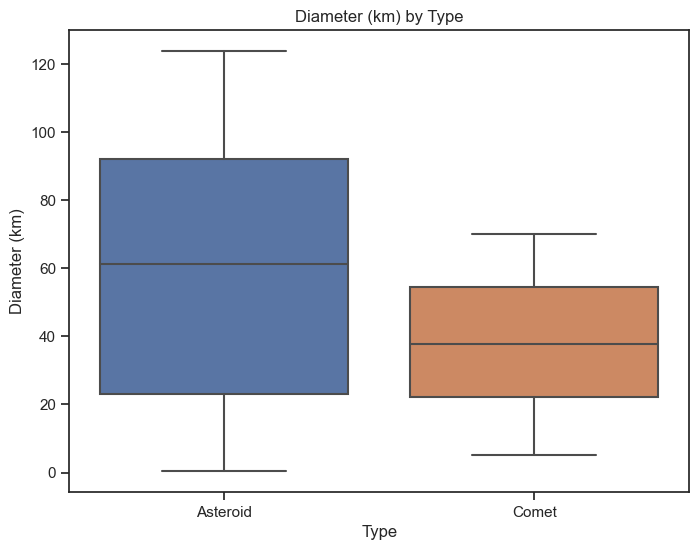

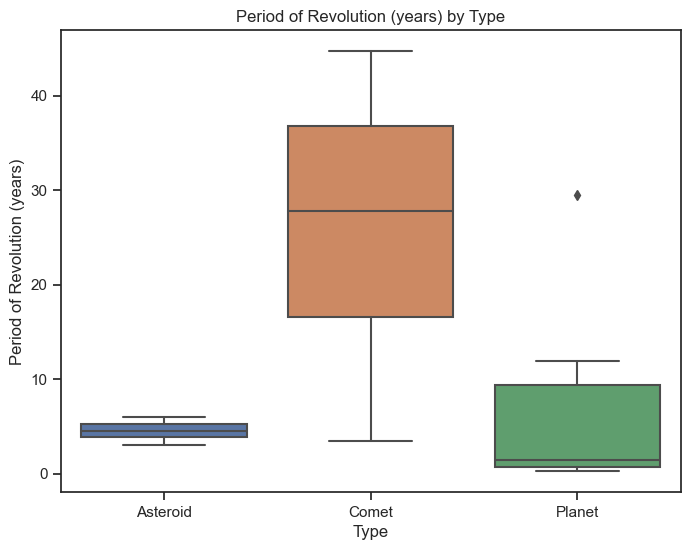

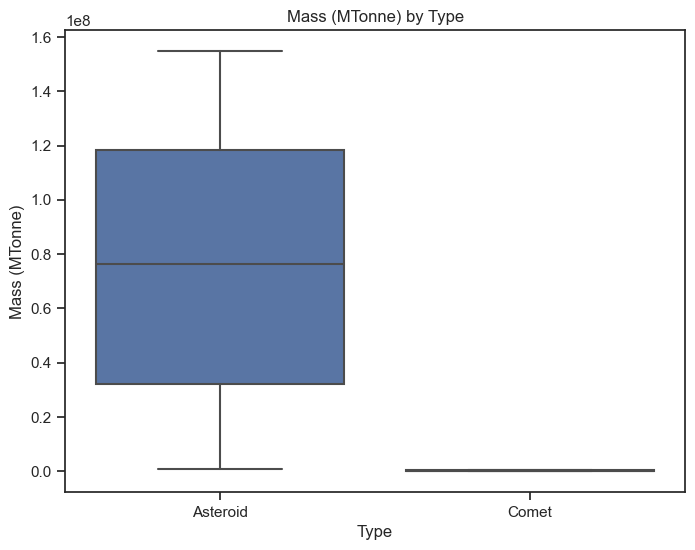

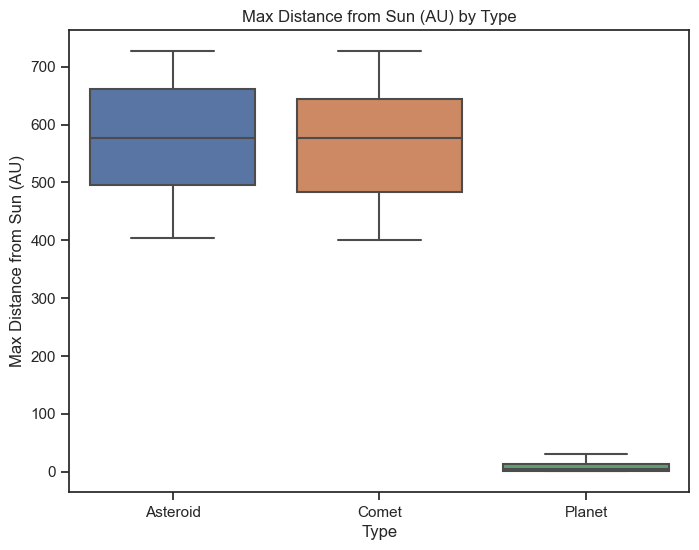

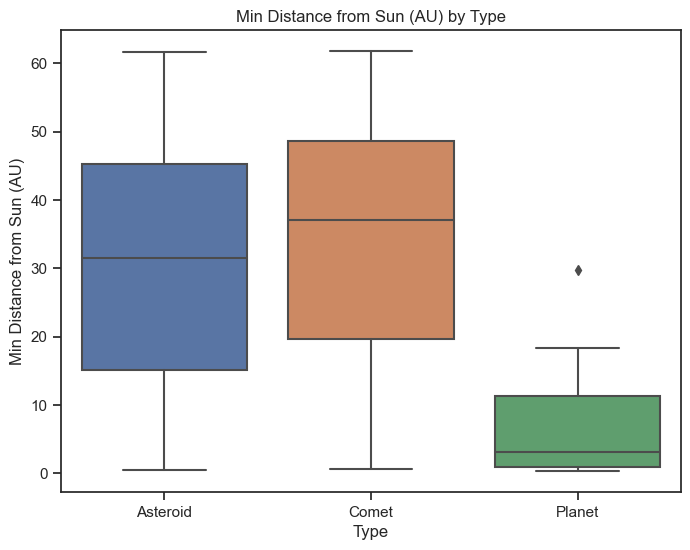

In [ ]:
# Box plot of features by labels
for elem in list(df.describe().columns):
    df7 = df[df[elem]<=df[elem].quantile(0.59)]
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df7, x='Type', y=elem)
    plt.title(f'{elem} by Type')
    plt.xlabel('Type')
    plt.ylabel(elem)
    plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6716\715874723.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


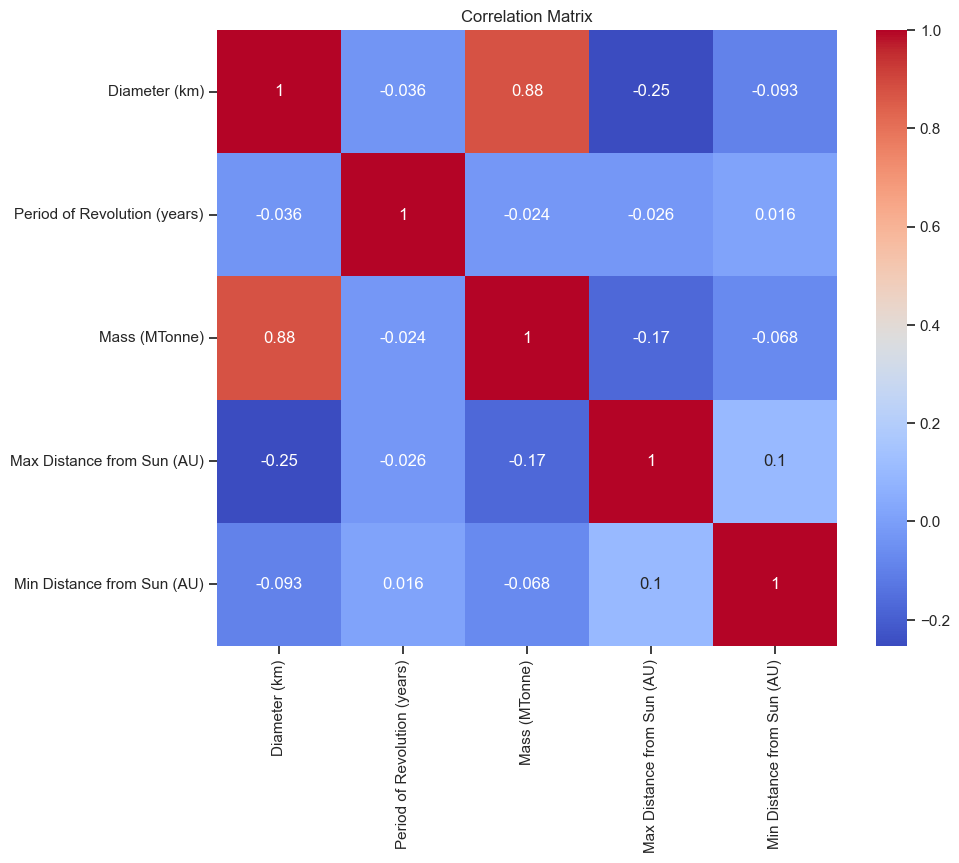

In [ ]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Grouping and Aggregation
grouped_data = df.groupby('Type').agg({'Diameter (km)': 'mean', 'Mass (MTonne)': 'mean'})
print(grouped_data)

          Diameter (km)  Mass (MTonne)
Type                                  
Asteroid     266.970937   3.591321e+08
Comet         38.057561   2.507257e+05
Planet     49097.375000   3.335765e+17


In [ ]:
# Statistical Analysis
asteroid_data = df[df['Type'] == 'Asteroid']
comet_data = df[df['Type'] == 'Comet']
planet_data = df[df['Type'] == 'Planet']

In [ ]:
# Compare mean diameter between asteroids and comets
t_statistic, p_value = ttest_ind(asteroid_data['Diameter (km)'], comet_data['Diameter (km)'])
print('Comparison of Asteroids and Comet - Diameter (km)')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

Comparison of Asteroids and Comet - Diameter (km)
T-statistic: 31.147383944714644
P-value: 3.025448290310746e-147


In [ ]:
# Compare mean mass between comets and comets
t_statistic, p_value = ttest_ind(comet_data['Mass (MTonne)'], asteroid_data['Mass (MTonne)'])
print('Comparison of Comets and Asteroid - Mass (MTonne)')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

Comparison of Comets and Asteroid - Mass (MTonne)
T-statistic: -37.08670455149047
P-value: 9.755285841051267e-187


### Statistical Results:
1. Modulus of T-statistic for both mass and diameter of comet-asteroid camparison displays value of more than 30, which suggest rejection of null hypothesis and a huge mean difference between mass and diameter of comet & asteroids
2. P-value smaller than 0.05, rejects null hypothesis again and suggest the same conclusion of huge difference

In [ ]:
# Step 1: Prepare the data (assuming x and y are already defined)
# Convert y(label) categorical values to numerical values for training purpose
type_mapping = {'Asteroid': 0, 'Comet':1, 'Planet':2}
df['Type_label'] = df['Type'].map(type_mapping)
y = df['Type_label']

x = df.drop(['Name','Type','Type_label'], axis=1)

In [ ]:
# Initialize a RobustScaler object
scaler = StandardScaler()

# Fit and transform the dataset using the RobustScaler
X_transformed = scaler.fit_transform(x)

# Convert the transformed array back to a DataFrame
x = pd.DataFrame(X_transformed, columns=x.columns)


In [ ]:
# Step 2: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 3: Build the classification model (using Logistic Regression as an example)
model = LogisticRegression()
model.fit(x_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(x_test)

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.953125


### Testing the model with test dataset

In [ ]:
list_df = [x_train, x_test, y_train, y_test]
x_train, x_test, y_train, y_test = [df.reset_index() for df in list_df]

In [ ]:
x_train.drop(['index'], axis=1, inplace=True)
x_test.drop(['index'], axis=1, inplace=True)
y_train.drop(['index'], axis=1, inplace=True)
y_test.drop(['index'], axis=1, inplace=True)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((766, 5), (192, 5), (766, 1), (192, 1))

In [ ]:
# taking random label from the dataset
n = np.random.randint(low=0, high=191)
y_test.iloc[n:n+1,:]

,Type_label
169,0


In [ ]:
# respective feature value array converted into list
arr = x_test.iloc[n:n+1,:].values.astype(list)
x_list = arr[0].tolist()
x_list

[-0.026105109940997198,
 -0.730196807725325,
 -0.04341890435345362,
 0.5886896742101421,
 1.1594271610211486]

In [ ]:
# prediction is performed with the model and shape of galaxy is displayed
predict = model.predict([x_list])

if predict[0]==0:
    print('0: Asteroid')
elif predict[0]==1:
    print('1: Comet')
else:
    print("2: Planet")

0: Asteroid


c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Predicting new dataset

In [ ]:
a = float(input('Enter the Diameter in kms'))
b = float(input('Enter the period of revolution in years'))
c = float(input('Enter the mass in million tonnes'))
d = float(input('Enter maximum distance from sun in AU'))
e = float(input('Enter minimum distance from sun in AU'))

In [ ]:
input_list = [a,b,c,d,e]
print(input_list)
# reshape the data into 2D array
data_2d = [[x] for x in input_list]
print(data_2d)
# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit and transform the dataset using the RobustScaler
X_transformed = scaler.fit_transform(data_2d)
print(X_transformed)
# reshape the standardized data back back to 1D data
final_data = X_transformed.flatten()
print(final_data)

[10.0, 2.0, 20000.0, 200.0, 50.0]
[[10.0], [2.0], [20000.0], [200.0], [50.0]]
[[-0.50694001]
 [-0.50794326]
 [ 1.99991997]
 [-0.48311293]
 [-0.50192378]]
[-0.50694001 -0.50794326  1.99991997 -0.48311293 -0.50192378]


In [ ]:
# predicting the output
predict = model.predict([final_data])
if predict[0]==0:
    print('0: Asteroid')
elif predict[0]==1:
    print('1: Comet')
else:
    print("2: Planet")

1: Comet


c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Conclusion: We have analyzed the dataset and obtained many information regarding our solar system and prominent celestial bodies. We also developed a predictive model with more than 95% accuracy which can predict the type of celestial object based on its properties. So, we developed solar system object classification model along with its analysis.

_______________________________________________________________________________________________________________________________